In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
train_dataset=pd.read_csv('train.csv')
test_dataset=pd.read_csv('test.csv')
train_data=train_dataset.copy()
test_data=test_dataset.copy()

In [3]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_label=train_data.pop('label')
train_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
model=keras.Sequential([
    tf.keras.layers.Dense(512,activation='relu',input_shape=[784]),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 437,162
Trainable params: 437,162
Non-trainable params: 0
_________________________________________________________________


In [7]:
history=model.fit(train_data,train_label,epochs=20,validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 21s 638us/sample - loss: 2.0237 - accuracy: 0.7217 - val_loss: 0.4429 - val_accuracy: 0.8808
Epoch 2/20
33600/33600 [==============================] - 18s 526us/sample - loss: 0.4424 - accuracy: 0.8846 - val_loss: 0.2604 - val_accuracy: 0.9282
Epoch 3/20
33600/33600 [==============================] - 16s 486us/sample - loss: 0.2950 - accuracy: 0.9201 - val_loss: 0.2079 - val_accuracy: 0.9430
Epoch 4/20
33600/33600 [==============================] - 17s 493us/sample - loss: 0.2571 - accuracy: 0.9313 - val_loss: 0.1934 - val_accuracy: 0.9471
Epoch 5/20
33600/33600 [==============================] - 16s 487us/sample - loss: 0.2322 - accuracy: 0.9388 - val_loss: 0.1698 - val_accuracy: 0.9565
Epoch 6/20
33600/33600 [==============================] - 17s 501us/sample - loss: 0.2189 - accuracy: 0.9442 - val_loss: 0.2444 - val_accuracy: 0.9369
Epoch 7/20
33600/33600 [=====================

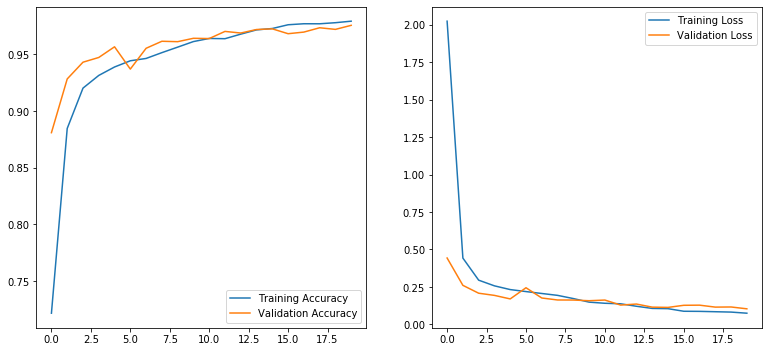

In [8]:
dic=history.history
train_acc=dic['accuracy']
val_acc=dic['val_accuracy']
train_loss=dic['loss']
val_loss=dic['val_loss']
epochs=range(len(train_acc))
plt.figure(figsize=(13,13))
plt.subplot(221)
plt.plot(epochs,train_acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.legend()

plt.subplot(222)
plt.plot(epochs,train_loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.legend()
plt.show()

In [9]:
predictions=model.predict(test_data)
test_pred=[]
for i in predictions:
    test_pred.append(np.argmax(i))
test_index=np.array(range(1,len(test_pred)+1))
test_pred=np.array(test_pred)
test_pred_df=pd.DataFrame()
test_pred_df['ImageId']=test_index
test_pred_df['Label']=test_pred
test_pred_df.to_csv('my_predictions.csv',index=False)